### Loading the model

In [0]:
import pickle
import matplotlib.pyplot as plt 

In [0]:
loadModel = pickle.load(open("/dbfs/FileStore/ML_modles/decisionTree20Sep.sav", 'rb'))

In [0]:
cluster_type = {"flights-m10":0, 'flights-m20':1, 'flights-m50':2, 'flights-m80':3,
       'flights-m200':4}

In [0]:
cluster_info = { "flights-m200":{"RAM":256, "CPUs":64, "pricePerHr":32.85, "Storage":256, "Iops":1100}, "flights-m50":{"RAM":32, "CPUs":8, "pricePerHr":5.84, "Storage":32, "Iops":500}, "flights-m80":{"RAM":128, "CPUs":32, "pricePerHr":19.73, "Storage":256, "Iops":1100}}

In [0]:
queryDict = {'RowInsert': 0, 'stringSearch_firstName': 1, 'stringSearch_last_name': 2}

### Necessary Functions - All the functions necessary for plotting and metrics should be kept

### Tuning the configuration

In [0]:
def tuningMongoConfiguration(dataVolume, models, cluster_info, cluster_type, queryType):
    jobs = [[cluster_type[cluster],cluster_info[cluster]['RAM'],cluster_info[cluster]['CPUs'],dataVolume,queryType, S, I , cluster_info[cluster]['Storage'],cluster_info[cluster]['Iops']]  for cluster in cluster_info.keys() for S in range(2) for I in range(2)]
    predictions = predict(jobs, models)
    return jobs, predictions
    
def predict(X_test, models):
    predictions = [list(model.predict(X_test)) for model in models]
    return predictions
            

In [0]:
jobs, predictions = tuningMongoConfiguration(10000000,[loadModel] ,cluster_info, cluster_type, 1)

In [0]:
clusterTypeReverse = {val:key for key, val in cluster_type.items()}

In [0]:
prices = []
minTimeIndex = -1
minTimeVal = float("inf")
for i in range(len(jobs)):
    cluster = clusterTypeReverse[jobs[i][0]]
    sharding =  clusterTypeReverse[jobs[i][4]]
    index =  clusterTypeReverse[jobs[i][5]]
    preds = predictions[0][i] 
    price =  predictions[0][i]*(cluster_info[cluster]['pricePerHr']/3600)
    
    prices.append(price)
    
    if preds <= minTimeVal:
        minTimeVal = preds
        minTimeIndex = i
 

print("The best configuration is cluster {} with the response time of {}s with a price of ${}".format(clusterTypeReverse[jobs[minTimeIndex][0]], predictions[0][minTimeIndex], prices[minTimeIndex]))

    
    

The best configuration is cluster flights-m80 with the response time of 0.8338646888732909s with a price of $0.004570041753186119

In [0]:
for i in range(len(jobs)):
    print(jobs[i], predictions[0][i], prices[i])

[4, 256, 64, 10000000, 1, 0, 0, 256, 1100] 13.75202751159668 0.12548725104331973
[4, 256, 64, 10000000, 1, 0, 1, 256, 1100] 13.75202751159668 0.12548725104331973
[4, 256, 64, 10000000, 1, 1, 0, 256, 1100] 1.5020053386688232 0.013705798715353015
[4, 256, 64, 10000000, 1, 1, 1, 256, 1100] 1.5020053386688232 0.013705798715353015
[2, 32, 8, 10000000, 1, 0, 0, 32, 500] 8.97721266746521 0.014563033882776896
[2, 32, 8, 10000000, 1, 0, 1, 32, 500] 8.97721266746521 0.014563033882776896
[2, 32, 8, 10000000, 1, 1, 0, 32, 500] 0.8338646888732909 0.0013527138286166718
[2, 32, 8, 10000000, 1, 1, 1, 32, 500] 0.8338646888732909 0.0013527138286166718
[3, 128, 32, 10000000, 1, 0, 0, 256, 1100] 8.97721266746521 0.049200112758080165
[3, 128, 32, 10000000, 1, 0, 1, 256, 1100] 8.97721266746521 0.049200112758080165
[3, 128, 32, 10000000, 1, 1, 0, 256, 1100] 0.8338646888732909 0.004570041753186119
[3, 128, 32, 10000000, 1, 1, 1, 256, 1100] 0.8338646888732909 0.004570041753186119

Out[204]:

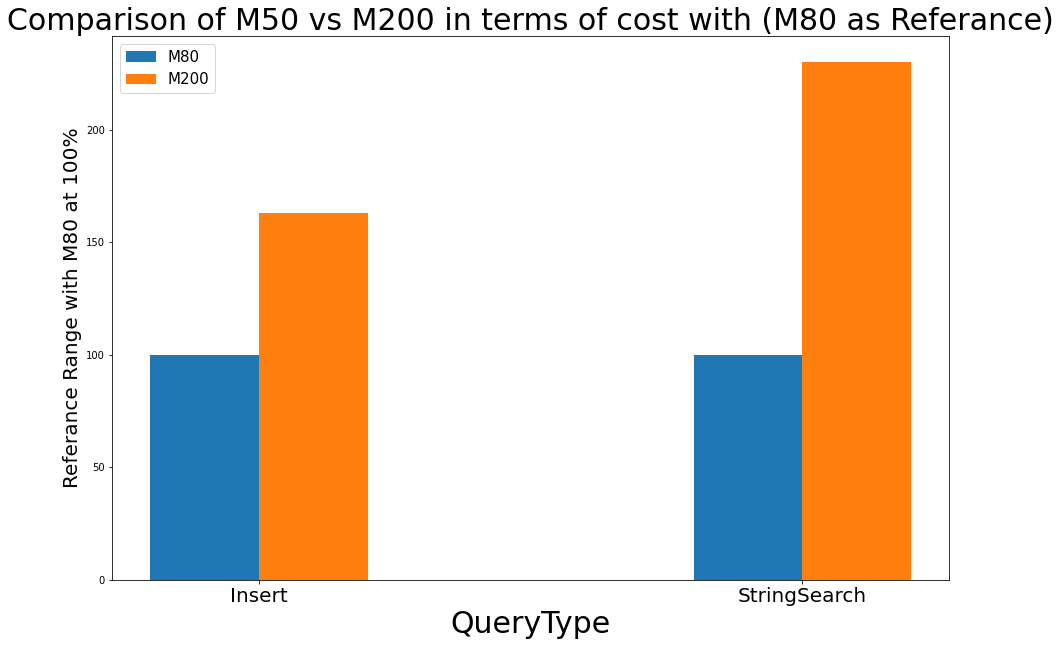

<matplotlib.legend.Legend at 0x7f33493a5760>

In [0]:
# 100M comparision for M-80 and M-200
fig = plt.figure(figsize=(15, 10))
M_80 = [100, 100]
M_200 = [163, 230]
X_axis = [0, 1]
plt.bar([x - 0.1 for x in X_axis], M_80, 0.2, label="M80")
plt.bar([x + 0.1 for x in X_axis], M_200, 0.2, label="M200")
plt.xticks(X_axis, ["Insert", "StringSearch"], fontsize=20)
plt.xlabel("QueryType", fontsize=30)
plt.ylabel("Referance Range with M80 at 100%", fontsize=20)
plt.title("Comparison of M50 vs M200 in terms of cost with (M80 as Referance)", fontsize=30)
plt.legend(fontsize=15)

Out[206]:

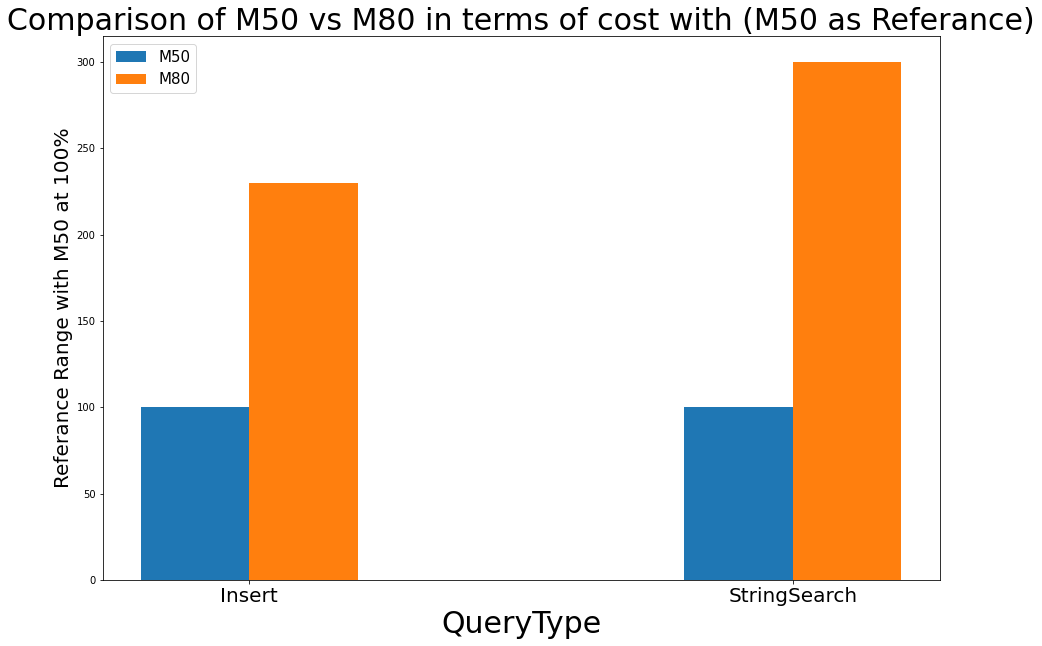

<matplotlib.legend.Legend at 0x7f33494241c0>

In [0]:
# 10M comparision for M-50 and M-80
fig = plt.figure(figsize=(15, 10))
M_50 = [100, 100]
M_80 = [230, 300]
X_axis = [0, 1]
plt.bar([x - 0.1 for x in X_axis], M_50, 0.2, label="M50")
plt.bar([x + 0.1 for x in X_axis], M_80, 0.2, label="M80")
plt.xticks(X_axis, ["Insert", "StringSearch"], fontsize=20)
plt.xlabel("QueryType", fontsize=30)
plt.ylabel("Referance Range with M50 at 100%", fontsize=20)
plt.title("Comparison of M50 vs M80 in terms of cost with (M50 as Referance)", fontsize=30)
plt.legend(fontsize=15)